<a href="https://colab.research.google.com/github/WonminSong/AI/blob/master/titanic_super_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

중3

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [56]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/AI/titanic")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [58]:
train = pd.read_csv("/content/drive/My Drive/AI/titanic/train.csv")
test = pd.read_csv("/content/drive/My Drive/AI/titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/My Drive/AI/titanic/gender_submission.csv")

In [59]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Boulos, Master. Akar",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [60]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C


In [64]:
len(test)

418

### data visualization

In [65]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [66]:
train["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

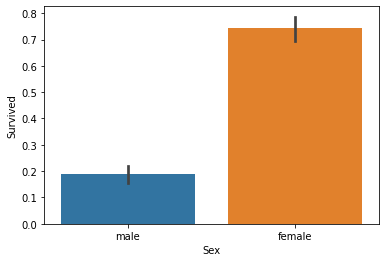

In [67]:
sns.barplot(x="Sex", y="Survived",data=train)

In [68]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

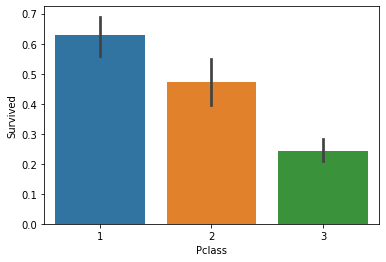

In [69]:
sns.barplot(x="Pclass",y="Survived",data=train)

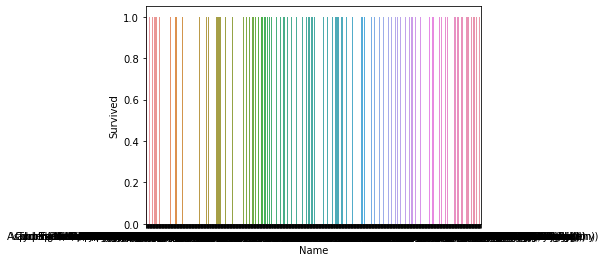

In [70]:
sns.barplot(x="Name",y="Survived",data=train)

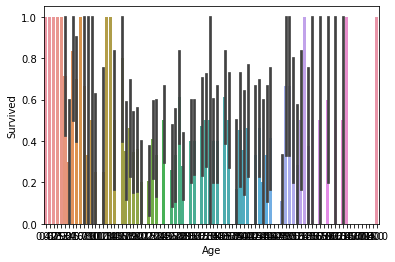

In [71]:
sns.barplot(x="Age",y="Survived",data=train)

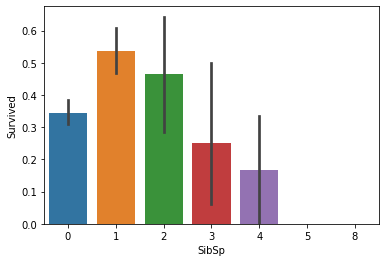

In [72]:
sns.barplot(x="SibSp",y="Survived",data=train)

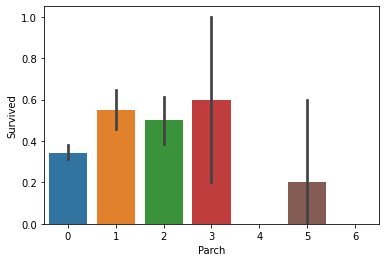

In [73]:
sns.barplot(x="Parch",y="Survived",data=train)

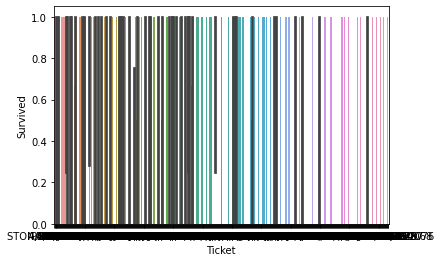

In [74]:
sns.barplot(x="Ticket",y="Survived",data=train)

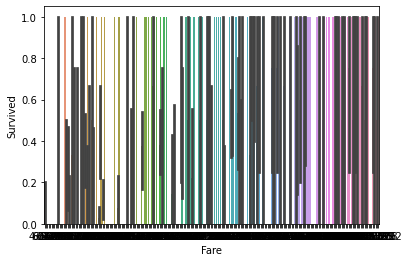

In [75]:
sns.barplot(x="Fare",y="Survived",data=train)

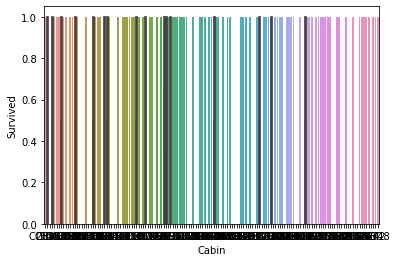

In [76]:
sns.barplot(x="Cabin",y="Survived",data=train)

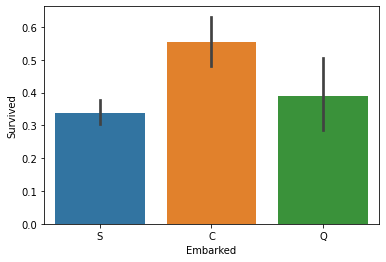

In [77]:
sns.barplot(x="Embarked",y="Survived",data=train)

In [78]:
train["Age"].isnull().sum()

177

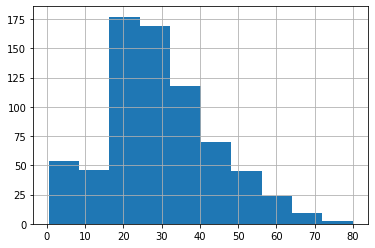

In [79]:
train["Age"].hist()

<function matplotlib.pyplot.show>

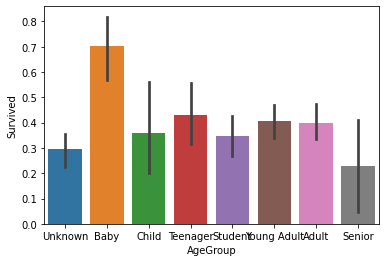

In [80]:
train["Age"]= train["Age"].fillna(-0.5)
test["Age"]= test["Age"].fillna(-0.5)
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels=["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Senior"]
train["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
test["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
sns.barplot(x="AgeGroup",y="Survived",data=train)
plt.show

In [81]:
train["Cabin"].isnull().sum()

687

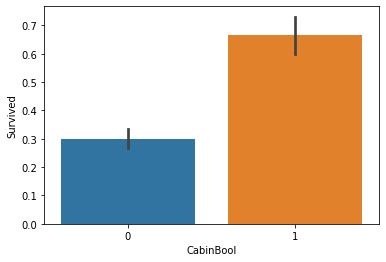

In [82]:
train["CabinBool"]=train["Cabin"].notnull().astype("int")
test["CabinBool"]=test["Cabin"].notnull().astype("int")
sns.barplot(x="CabinBool",y="Survived",data=train)

In [83]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Boulos, Master. Akar",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,100,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [84]:
train=train.drop(["Cabin"],axis=1)
test=test.drop(["Cabin"],axis=1)

In [85]:
train=train.drop(["Ticket"],axis=1)
test=test.drop(["Ticket"],axis=1)

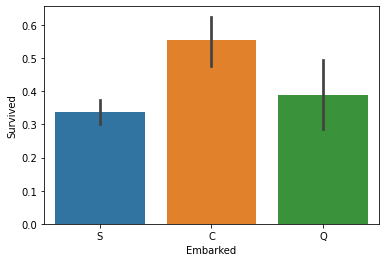

In [86]:
sns.barplot(x="Embarked",y="Survived",data=train)

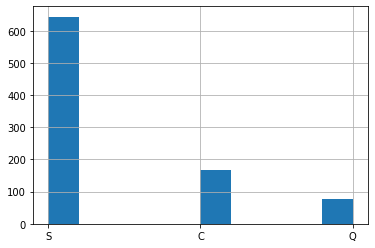

In [87]:
train.Embarked.hist()

In [88]:
train=train.fillna({"Embarked":"S"})

In [89]:
train=train.drop(["Name"],axis=1)
test=test.drop(["Name"],axis=1)

In [90]:
age_group_mapping={1:"Baby",2:"Child",3:"Teenager",4:"Student",5:"Young Adult",6:"Adult",7:"Senior"}

In [91]:
train["AgeGroup"]=train["AgeGroup"].map(age_group_mapping)
test["AgeGroup"]=test["AgeGroup"].map(age_group_mapping)

In [92]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeGroup       891
CabinBool        0
dtype: int64

In [93]:
train["AgeGroup"]=train["AgeGroup"].fillna("0")
test["AgeGroup"]=test["AgeGroup"].fillna("0")

In [94]:
train["AgeGroup"]

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: AgeGroup, Length: 891, dtype: object

In [95]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,male,22.0,1,0,7.2500,S,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,0
887,888,1,1,female,19.0,0,0,30.0000,S,0,1
888,889,0,3,female,-0.5,1,2,23.4500,S,0,0
889,890,1,1,male,26.0,0,0,30.0000,C,0,1


In [96]:
train=train.drop(["Age"],axis=1)
test=test.drop(["Age"],axis=1)

In [97]:
sex_group_mapping={"male":0,"female":1}
train["Sex"]=train["Sex"].map(sex_group_mapping)
test["Sex"]=test["Sex"].map(sex_group_mapping)

In [98]:
embarked_group_mapping={"S":1,"C":2,"Q":3}
train["Embarked"]=train["Embarked"].map(embarked_group_mapping)
test["Embarked"]=test["Embarked"].map(embarked_group_mapping)

In [99]:
test.Fare.mean()

35.6271884892086

In [100]:
test["Fare"]=test.Fare.fillna(test.Fare.mean())

In [101]:
from sklearn.model_selection import train_test_split
predictors = train.drop(["Survived","PassengerId"], axis=1)
target = train["Survived"]
x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred=gaussian.predict(x_val)
acc_gaussian=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussian)

81.56


In [103]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

79.89


In [104]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred=perceptron.predict(x_val)
acc_perceptron=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_perceptron)

79.89


In [105]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_val)
acc_svc=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_svc)

70.95


In [106]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
y_pred=rforest.predict(x_val)
acc_rforest=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_rforest)

83.24


In [107]:
ids = test["PassengerId"]
preds = rforest.predict(test.drop('PassengerId', axis=1))

In [108]:
output = pd.DataFrame({"PassengerId":ids, "Survived":preds})
output.to_csv("submission.csv", index=False)